<a href="https://colab.research.google.com/github/satishchaudhary382/RFM/blob/master/calculating%20resistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import yfinance as yf
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv("/content/shivm.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace = True)

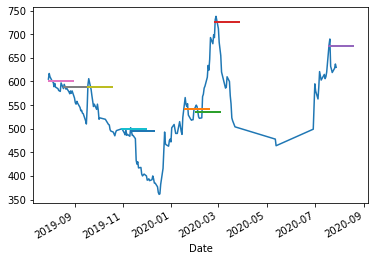

<Figure size 1440x720 with 0 Axes>

In [39]:
# start = dt.datetime(2020,1,1)
# now = dt.datetime.now()
# df = pdr.get_data_yahoo("SE",start, now)

df['High'].plot(label = "High")

pivots = []
dates =[]
counter = 0
lastPivot =0
Range = [0,0,0,0,0,0,0,0,0,0,0]
dateRange = [0,0,0,0,0,0,0,0,0,0,0]




for i in df.index:
  currentMax = max(Range, default = 0)
  value = round(df['Close'][i],2)

  Range = Range[1:9]
  Range.append(value)

  dateRange = dateRange[1:9]
  dateRange.append(i)

  if currentMax == max(Range, default = 0):
    counter+=1
  else:
    counter=0
  if counter == 5:
    lastPivot = currentMax
    dateloc = Range.index(lastPivot)
    lastDate = dateRange[dateloc]
    pivots.append(lastPivot)
    dates.append(lastDate)


  # print(str(pivots))
  # print(str(dates))
  timeD = dt.timedelta(days = 30)

  
  for index in range(len(pivots)):
    # print(str(pivots[index])+ ": "+str(dates[index]))
    
    plt.plot_date([dates[index],dates[index]+timeD],
                  [pivots[index],pivots[index]], linestyle = '-', linewidth =2,
                  marker = 'None')


plt.figure(figsize = (20,10))
plt.show()